# Тема “Обучение без учителя”

### Задание 1

Импортируйте библиотеки pandas, numpy и matplotlib.

In [1]:
import pandas as pd 
import numpy as np 
# import matplotlib as mpl
import matplotlib.pyplot as plt

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

Загрузите "Boston House Prices dataset" из встроенных наборов данных библиотеки sklearn.
Создайте датафреймы X и y из этих данных.

In [2]:
boston = load_boston()
data = boston["data"]
data.shape
feature_names = boston["feature_names"]
target = boston["target"]

X = pd.DataFrame(data, columns=feature_names)
y = pd.DataFrame(target, columns=["price"])

Разбейте эти датафреймы на тренировочные (X_train, y_train) и тестовые (X_test, y_test)
с помощью функции train_test_split так, чтобы размер тестовой выборки
составлял 20% от всех данных, при этом аргумент random_state должен быть равен 42.


In [3]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Масштабируйте данные с помощью StandardScaler.


In [4]:
scaler = StandardScaler()
print(scaler.fit(data))

StandardScaler()


Постройте модель TSNE на тренировочный данных с параметрами:
n_components=2, learning_rate=250, random_state=42.
Постройте диаграмму рассеяния на этих данных.

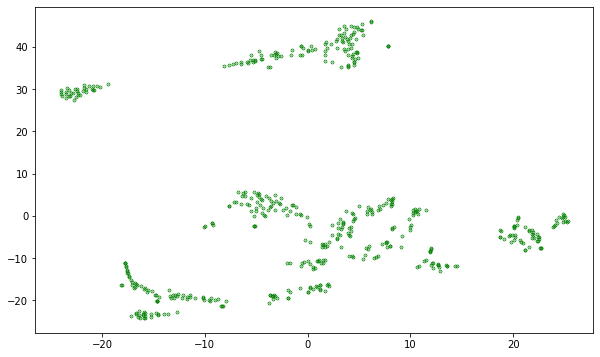

In [5]:
from sklearn.manifold import TSNE
X_embedded = TSNE(n_components=2, learning_rate=250, random_state=42).fit_transform(X)
X_embedded.shape
x1_data = X_embedded[:,0]
x2_data = X_embedded[:,1]
#print(x_data, y_data)

fig, ax = plt.subplots()

fig.set_size_inches(10, 6)

ax.scatter(x1_data, x2_data, s = 0.5, linewidths = 3, color = "g")

### Задание 2

С помощью KMeans разбейте данные из тренировочного набора на 3 кластера,
используйте все признаки из датафрейма X_train.
Параметр max_iter должен быть равен 100, random_state сделайте равным 42.

In [6]:
kmeans = KMeans(n_clusters=3, max_iter=100, random_state=42)
kmeans.fit(X_train)
y_train_kmeans = kmeans.predict(X_train)

Постройте еще раз диаграмму рассеяния на данных, полученных с помощью TSNE,
и раскрасьте точки из разных кластеров разными цветами.


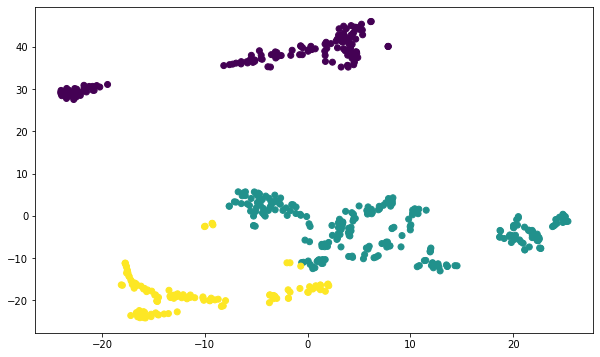

In [7]:
#fig, ax = plt.subplots()

#fig.set_size_inches(10, 6)

#ax.scatter(X_train.iloc[:, 0], X_train.iloc[:, 1], c=y_kmeans, s=50)

embedded_labels = kmeans.fit_predict(X_embedded)

fig, ax = plt.subplots()

fig.set_size_inches(10, 6)

ax.scatter(X_embedded[:, 0], X_embedded[:, 1], c=embedded_labels)

Вычислите средние значения price и CRIM в разных кластерах.

In [8]:
kmeans.fit(X)
y_kmeans = kmeans.predict(X)

print("Средние значения цен в первом, втором и третьем кластерах соответственно")
print(float(y[y_kmeans == 0].mean()), float(y[y_kmeans == 1].mean()), float(y[y_kmeans == 2].mean()))

print("Средние значения CRIM в первом, втором и третьем кластерах соответственно")
print(float(X[y_kmeans == 0].CRIM.mean()), float(X[y_kmeans == 1].CRIM.mean()), float(X[y_kmeans == 2].CRIM.mean()))

Средние значения цен в первом, втором и третьем кластерах соответственно
17.42941176470588 24.93169398907107 13.126315789473685
Средние значения CRIM в первом, втором и третьем кластерах соответственно
10.910511274509803 0.3749926775956283 15.219038157894733


### * Задание 3

Примените модель KMeans, построенную в предыдущем задании,
к данным из тестового набора.
Вычислите средние значения price и CRIM в разных кластерах на тестовых данных.

In [9]:
print("Средние значения цен в первом, втором и третьем кластерах соответственно")
print(float(y_train[y_train_kmeans == 0].mean()), float(y_train[y_train_kmeans == 1].mean()), float(y_train[y_train_kmeans == 2].mean()))

print("Средние значения CRIM в первом, втором и третьем кластерах соответственно")
print(float(X_train[y_train_kmeans == 0].CRIM.mean()), float(X_train[y_train_kmeans == 1].CRIM.mean()), float(X_train[y_train_kmeans == 2].CRIM.mean()))

Средние значения цен в первом, втором и третьем кластерах соответственно
25.168686868686873 13.196774193548386 17.4421052631579
Средние значения CRIM в первом, втором и третьем кластерах соответственно
0.40486282828282844 14.360380322580648 11.745661842105266
